In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from tqdm.notebook import tqdm

plt.style.use("ggplot")

In [2]:
df = pd.read_csv("depression_dataset_reddit_cleaned.csv")

In [3]:
df.head()

,clean_text,is_depression
0,we understand that most people who reply immed...,1
1,welcome to r depression s check in post a plac...,1
2,anyone else instead of sleeping more when depr...,1
3,i ve kind of stuffed around a lot in my life d...,1
4,sleep is my greatest and most comforting escap...,1


In [4]:
example = df["clean_text"].values[2]
print(example)

anyone else instead of sleeping more when depressed stay up all night to avoid the next day from coming sooner may be the social anxiety in me but life is so much more peaceful when everyone else is asleep and not expecting thing of you


## EDA

In [5]:
# Check the size of the dataset
print('Dataset shape:', df.shape)

Dataset shape: (7731, 2)


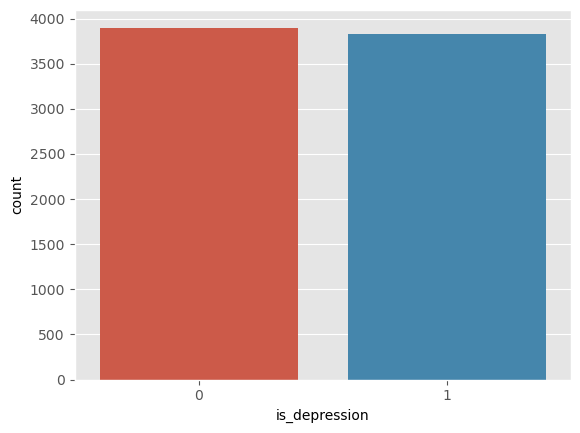

In [6]:
# Check the distribution of the target variable
sns.countplot(data=df, x='is_depression')
plt.show()

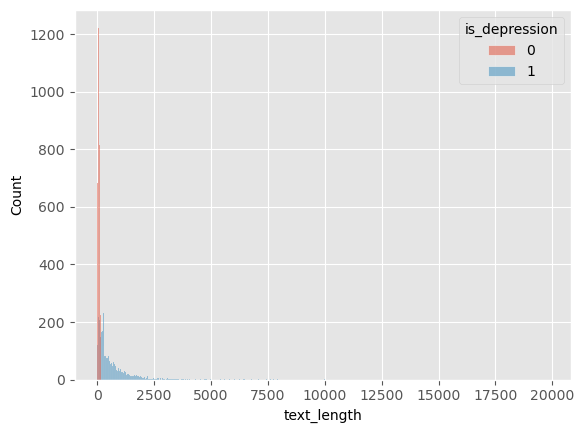

In [7]:
# Check the distribution of the length of the clean_text column
df['text_length'] = df['clean_text'].apply(len)
sns.histplot(data=df, x='text_length', hue='is_depression')
plt.show()


In [8]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rahul\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [9]:
# Check the most common words in the clean_text column
from collections import Counter
from nltk.tokenize import word_tokenize

tokens = df['clean_text'].apply(word_tokenize).sum()
word_freq = Counter(tokens)

print(word_freq.most_common(20))

[('i', 40409), ('to', 17965), ('and', 16326), ('a', 12636), ('the', 11932), ('my', 11430), ('it', 9976), ('of', 7738), ('t', 7695), ('me', 6941), ('that', 6506), ('in', 6088), ('m', 5749), ('but', 5427), ('is', 5323), ('for', 5196), ('have', 5007), ('this', 4557), ('just', 4527), ('so', 4337)]


## Roberta Model

In [10]:
from transformers import AutoTokenizer 
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax 

In [11]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [12]:
# Run for Roberta Model
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'negative' : scores[0],
    'neutral' : scores[1],
    'positive' : scores[2]
}
print(scores_dict)

{'negative': 0.084303886, 'neutral': 0.32322067, 'positive': 0.5924754}


In [13]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'negative' : scores[0],
        'neutral' : scores[1],
        'positive' : scores[2]
    }
    return scores_dict

In [ ]:
res = {}
id = 0
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['clean_text']
        myid = id
        roberta_result = polarity_scores_roberta(text)
        res[myid] = roberta_result
    except RuntimeError:
        print(f'Broke for id {myid}')
    id += 1

  0%|          | 0/7731 [00:00<?, ?it/s]

Broke for id 0


In [ ]:
res